<a href="https://colab.research.google.com/github/Thewaiii/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>> Midterm ส่ง วันอาทิตย์ ที่ 11/02/2567 ก่อน 23:59 น

>> 643021261-5 นางสาวจารุพร การร้อย

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

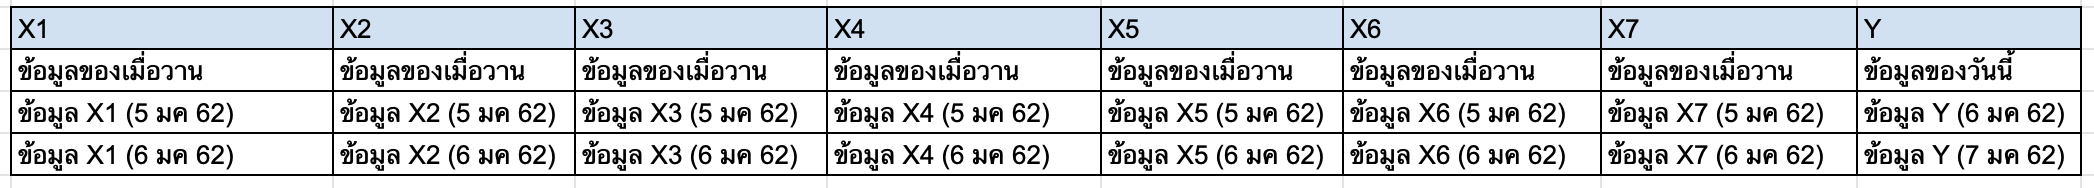

## DATA

In [644]:
import pandas as pd
import json
import numpy as np


In [645]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [646]:
import os
os.chdir('/content/drive/MyDrive/BSC_DBDM23/อุตุ')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/drive/.shortcut-targets-by-id/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4/อุตุ


In [435]:
!ls

'ความกด(เปอร์เซ็นต์)'	 'ความเร็วลม(นอต)'   'ปริมาณฝน(มิลลิเมตร)'	     'อุณหภูมิต่ำสุด(เซลเซียส)'
'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'  'จำนวนเมฆ(10ส่วน)'  'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'  'อุณหภูมิตุ้มแห้ง(เซลเซียส)'


##ความกด

เรียกใช้ไฟล์

In [436]:
Pressure_kkn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4 )
Pressure_kkn.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(Pressure_kkn.shape) # shown nomber of (row, column)

Pressure_npm = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4 )
Pressure_npm.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(Pressure_npm.shape)

Pressure_skn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4 )
Pressure_skn.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(Pressure_skn.shape)

Pressure_nki = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4 )
Pressure_nki.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(Pressure_nki.shape)

Pressure_lei = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4 )
Pressure_lei.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(Pressure_lei.shape)

(55, 35)
(55, 35)
(55, 35)
(55, 35)
(55, 35)


>>ขอนแก่น kkn

In [437]:
Pressure_kkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,1011.207500


In [438]:
a = str(Pressure_kkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ') #เลือกตัวแรก(ปี)
    A.append(resSp[1]) #ติดลำดับมาด้วย เลยต้องเลือกตัวที่2(ปี)
Pressure_kkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1]) #เลือกตัวที่2(เดือน)
Pressure_kkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
Pressure_kkn['จังหวัด'] = A

In [439]:
ak = Pressure_kkn [['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [440]:
Pressure_kkn= ak.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index() #set index ด้วย ค่าที่ไม่อยากให้ stack
Pressure_kkn.rename(columns={'level_4': 'วัน', 0: 'ความกด'}, inplace=True)
akn =Pressure_kkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความกด']]
akn.head(3)

,จังหวัด,สถานี,วัน,เดือน,ปี,ความกด
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,1,10,2011,1005.47
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,2,10,2011,1006.65
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,3,10,2011,1007.49


>>นครพนม npm

In [441]:
Pressure_npm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.86,1011.24,1008.82,1007.46,1008.65,1010.53,1010.41,...,1011.63,1010.67,1010.17,1009.78,1008.53,1008.22,1008.94,1009.54,1012.76,1010.840323
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.26,1011.77,1010.84,1010.77,1011.02,1011.49,1010.06,...,1008.87,1010.93,1011.45,1011.22,1011.43,1010.70,1010.66,1009.89,-,1010.984000
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.12,1010.89,1011.93,1011.30,1012.01,1013.16,1012.68,...,1016.81,1017.31,1014.43,1012.45,1011.32,1010.47,1010.69,1014.48,1016.22,1012.551935
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.52,1014.01,1015.36,1014.22,1012.47,1013.17,1013.46,...,1014.11,1013.65,1013.57,1013.25,1015.31,1016.70,1015.92,1015.57,1016.14,1014.798710
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.63,1014.87,1014.45,1014.43,1013.88,1011.52,1008.45,...,1017.17,1014.55,1012.39,1011.08,1008.62,1007.56,-,-,-,1012.171429


In [442]:
a = str(Pressure_npm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Pressure_npm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
Pressure_npm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
Pressure_npm['จังหวัด'] = A

In [443]:
an = Pressure_npm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [444]:
Pressure_npm = an.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Pressure_npm.rename(columns={'level_4': 'วัน', 0: 'ความกด'}, inplace=True)
ann = Pressure_npm[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความกด']]
ann.head(3)

,จังหวัด,สถานี,วัน,เดือน,ปี,ความกด
0,นครพนม,352201-หนองคาย จ.หนองคาย,1,10,2011,1006.3
1,นครพนม,352201-หนองคาย จ.หนองคาย,2,10,2011,1007.38
2,นครพนม,352201-หนองคาย จ.หนองคาย,3,10,2011,1008.07


>> สกลนคร skn

In [445]:
Pressure_skn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.87,1011.39,1008.88,1007.37,1008.45,1010.70,1010.49,...,1011.86,1010.66,1010.31,1009.83,1008.81,1008.29,1008.93,1009.38,1012.62,1010.898710
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.30,1011.97,1010.91,1010.93,1011.18,1011.66,1010.08,...,1008.84,1011.12,1011.66,1011.47,1011.38,1010.89,1010.67,1009.88,-,1011.054333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.19,1010.80,1011.88,1011.57,1011.81,1013.40,1012.71,...,1016.55,1017.46,1014.48,1012.58,1011.33,1010.65,1010.82,1014.19,1016.29,1012.625806
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.64,1014.29,1015.26,1014.42,1012.56,1013.52,1013.53,...,1014.27,1013.68,1013.54,1013.54,1015.37,1017.02,1015.94,1015.75,1016.68,1014.938387
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.79,1015.14,1014.60,1014.74,1014.09,1011.73,1008.51,...,1017.21,1014.62,1012.56,1011.07,1008.70,1007.22,-,-,-,1012.235000


In [446]:
a = str(Pressure_skn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Pressure_skn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
Pressure_skn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
Pressure_skn['จังหวัด'] = A

In [447]:
ask = Pressure_skn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [448]:
Pressure_skn = ask.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Pressure_skn.rename(columns={'level_4': 'วัน', 0: 'ความกด'}, inplace=True)
askn = Pressure_skn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความกด']]
askn.head(3)

,จังหวัด,สถานี,วัน,เดือน,ปี,ความกด
0,สกลนคร,352201-หนองคาย จ.หนองคาย,1,10,2011,1005.84
1,สกลนคร,352201-หนองคาย จ.หนองคาย,2,10,2011,1007.16
2,สกลนคร,352201-หนองคาย จ.หนองคาย,3,10,2011,1007.87


>> หนองคาย nki

In [449]:
Pressure_nki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.66,1011.44,1008.66,1006.94,1008.62,1011.05,1010.61,...,1011.80,1010.75,1010.30,1009.82,1009.26,1008.40,1008.97,1008.89,1012.23,1010.823871
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.25,1011.65,1010.88,1010.79,1010.84,1011.38,1009.94,...,1009.16,1010.86,1011.62,1011.53,1011.11,1010.83,1010.74,1010.1,-,1010.951667
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.04,1010.28,1011.34,1011.40,1011.31,1013.40,1012.42,...,1015.72,1017.22,1014.72,1012.86,1011.53,1010.58,1010.92,1012.66,1015.72,1012.494516
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.38,1014.02,1014.56,1014.07,1012.31,1012.87,1013.07,...,1013.98,1013.14,1012.74,1013.02,1015.21,1016.80,1015.97,1015.36,1017.11,1014.523871
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1016.12,1015.23,1014.67,1014.85,1014.34,1011.44,1008.49,...,1016.37,1014.56,1012.50,1010.69,1008.41,1006.75,-,-,-,1011.956786


In [450]:
a = str(Pressure_nki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Pressure_nki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
Pressure_nki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
Pressure_nki['จังหวัด'] = A

In [451]:
ank = Pressure_nki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [452]:
Pressure_nki = ank.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Pressure_nki.rename(columns={'level_4': 'วัน', 0: 'ความกด'}, inplace=True)
ankn = Pressure_nki[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความกด']]
ankn.head(3)

,จังหวัด,สถานี,วัน,เดือน,ปี,ความกด
0,หนองคาย,352201-หนองคาย จ.หนองคาย,1,10,2011,1005.34
1,หนองคาย,352201-หนองคาย จ.หนองคาย,2,10,2011,1006.67
2,หนองคาย,352201-หนองคาย จ.หนองคาย,3,10,2011,1007.39


>>เลย lei

In [453]:
Pressure_lei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.41,1010.77,1008.72,1007.10,1008.28,1010.43,1010.47,...,1011.23,1010.45,1009.91,1009.48,1008.96,1008.94,1008.57,1008.67,1011.74,1010.511613
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.46,1011.06,1010.41,1010.43,1010.33,1010.79,1009.67,...,1008.87,1010.62,1011.06,1010.99,1010.52,1010.43,1010.11,1009.83,-,1010.542667
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.81,1010.25,1011.09,1010.69,1010.66,1011.99,1011.76,...,1014.52,1016.15,1013.87,1012.48,1011.23,1010.29,1010.23,1011.63,1014.75,1011.970645
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.63,1013.32,1013.99,1012.97,1011.70,1012.76,1012.56,...,1013.02,1012.71,1012.15,1011.74,1014.16,1015.69,1014.81,1014.81,1016.39,1013.735484
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.68,1014.51,1013.94,1013.86,1013.70,1011.59,1008.45,...,1015.19,1013.89,1012.02,1010.21,1008.33,1006.60,-,-,-,1011.348571


In [454]:
a = str(Pressure_lei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Pressure_lei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
Pressure_lei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
Pressure_lei['จังหวัด'] = A

In [455]:
al = Pressure_lei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [456]:
Pressure_lei = al.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Pressure_lei.rename(columns={'level_4': 'วัน', 0: 'ความกด'}, inplace=True)
aln =Pressure_lei[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความกด']]
ann.head(3)

,จังหวัด,สถานี,วัน,เดือน,ปี,ความกด
0,นครพนม,352201-หนองคาย จ.หนองคาย,1,10,2011,1006.3
1,นครพนม,352201-หนองคาย จ.หนองคาย,2,10,2011,1007.38
2,นครพนม,352201-หนองคาย จ.หนองคาย,3,10,2011,1008.07


##ความชื้นสัมพัทธ์

เรียกใช้ไฟล์

In [457]:
Humidity_kkn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4 )
Humidity_kkn.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(Humidity_kkn.shape) # shown nomber of (row, column)

Humidity_npm = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4 )
Humidity_npm.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(Humidity_npm.shape)

Humidity_skn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4 )
Humidity_skn.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(Humidity_skn.shape)

Humidity_nki = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4 )
Humidity_nki.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(Humidity_nki.shape)

Humidity_lei = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4 )
Humidity_lei.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(Humidity_lei.shape)

(55, 35)
(55, 35)
(55, 35)
(55, 35)
(55, 35)


>>ขอนแก่น kkn

In [458]:
Humidity_kkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,73,73,72,81,83,73,70,...,65,68,69,69,62,64,69,74,68,72
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,64,67,67,66,65,65,67,...,63,75,82,75,73,73,75,74,-,68
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,68,66,69,71,69,63,67,...,59,56,60,59,58,61,57,55,54,62
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,62,58,59,60,62,61,62,...,59,59,59,67,71,91,78,71,72,63
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,69,66,62,58,59,53,50,...,50,52,56,53,51,54,-,-,-,55


In [459]:
a = str(Humidity_kkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Humidity_kkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
Humidity_kkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
Humidity_kkn['จังหวัด'] = A

In [460]:
bk = Humidity_kkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [461]:
 Humidity_kkn= bk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Humidity_kkn.rename(columns={'level_4': 'วัน', 0: 'ความชื้นสัมพัทธ์'}, inplace=True)
bkn = Humidity_kkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความชื้นสัมพัทธ์']]

>>นครพนม npm

In [462]:
Humidity_npm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72,70,69,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66,65,-,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63,66,70,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61,59,62,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69,-,-,65
5,3,357201-นครพนม จ.นครพนม,2012-10-01,68,72,74,79,81,66,72,...,69,69,64,66,67,73,75,76,66,70
6,4,357201-นครพนม จ.นครพนม,2012-11-01,67,69,71,70,69,67,68,...,66,76,80,74,63,69,82,78,-,70
7,5,357201-นครพนม จ.นครพนม,2012-12-01,76,73,70,70,70,61,68,...,54,61,65,64,67,68,62,54,56,67
8,6,357201-นครพนม จ.นครพนม,2013-01-01,62,67,64,69,69,60,67,...,59,64,61,72,66,82,70,64,71,65
9,7,357201-นครพนม จ.นครพนม,2013-02-01,72,62,71,69,64,63,61,...,58,60,62,60,59,62,-,-,-,61


In [463]:
a = str(Humidity_npm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Humidity_npm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
Humidity_npm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
Humidity_npm['จังหวัด'] = A

In [464]:
bn = Humidity_npm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [465]:
Humidity_npm= bn.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Humidity_npm.rename(columns={'level_4': 'วัน', 0: 'ความชื้นสัมพัทธ์'}, inplace=True)
bnn = Humidity_npm[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความชื้นสัมพัทธ์']]

In [466]:
bnn.isnull().any()

จังหวัด             False
สถานี               False
วัน                 False
เดือน               False
ปี                  False
ความชื้นสัมพัทธ์    False
dtype: bool

>> สกลนคร skn

In [467]:
Humidity_skn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74,73,72,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69,69,-,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69,69,68,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64,64,62,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71,-,-,64
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,65,73,73,82,80,69,71,...,70,67,67,70,67,65,72,75,66,70
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,63,67,70,69,67,66,67,...,65,72,75,72,65,70,84,78,-,69
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,75,72,68,71,71,67,68,...,61,62,64,65,67,69,65,62,60,67
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,65,67,64,68,67,65,66,...,61,63,64,73,73,82,72,67,72,66
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,72,65,69,69,65,56,56,...,57,59,61,58,57,57,-,-,-,60


In [468]:
a = str(Humidity_skn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Humidity_skn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
Humidity_skn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
Humidity_skn['จังหวัด'] = A

In [469]:
bsk = Humidity_skn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [470]:
Humidity_skn = bsk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Humidity_skn.rename(columns={'level_4': 'วัน', 0: 'ความชื้นสัมพัทธ์'}, inplace=True)
bskn = Humidity_skn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความชื้นสัมพัทธ์']]

>> หนองคาย nki

In [471]:
Humidity_nki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,69,70,74,81,84,79,68,...,69,70,70,70,69,67,69,72,60,72
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,63,68,69,70,67,69,68,...,70,74,79,77,76,72,84,76,-,71
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,76,74,71,73,75,66,73,...,61,62,63,68,69,71,69,63,59,69
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,67,68,66,68,69,68,67,...,67,64,66,67,86,83,76,68,88,68
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,81,77,74,69,67,65,57,...,53,57,61,59,60,65,-,-,-,64


In [472]:
a = str(Humidity_nki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Humidity_nki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
Humidity_nki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
Humidity_nki['จังหวัด'] = A

In [473]:
bnk = Humidity_nki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [474]:
Humidity_nki = bnk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Humidity_nki.rename(columns={'level_4': 'วัน', 0: 'ความชื้นสัมพัทธ์'}, inplace=True)
bnkn = Humidity_nki[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความชื้นสัมพัทธ์']]

In [475]:
bnkn .head()

,จังหวัด,สถานี,วัน,เดือน,ปี,ความชื้นสัมพัทธ์
0,หนองคาย,352201-หนองคาย จ.หนองคาย,1,10,2011,89
1,หนองคาย,352201-หนองคาย จ.หนองคาย,2,10,2011,91
2,หนองคาย,352201-หนองคาย จ.หนองคาย,3,10,2011,78
3,หนองคาย,352201-หนองคาย จ.หนองคาย,4,10,2011,75
4,หนองคาย,352201-หนองคาย จ.หนองคาย,5,10,2011,90


>> เลย lei

In [476]:
Humidity_lei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,87,84,92,91,90,91,88,...,80,81,81,80,80,76,79,80,75,84
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,72,80,80,84,82,83,78,...,82,89,87,87,85,86,88,84,-,82
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,84,83,88,87,85,76,82,...,75,70,78,81,77,79,81,73,67,80
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,78,77,75,74,77,77,77,...,72,75,79,76,88,86,82,78,92,76
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,85,83,79,72,73,72,66,...,59,63,67,64,66,71,-,-,-,69


In [477]:
a = str(Humidity_lei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
Humidity_lei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
Humidity_lei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
Humidity_lei['จังหวัด'] = A

In [478]:
bl = Humidity_lei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [479]:
Humidity_lei = bl.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
Humidity_lei.rename(columns={'level_4': 'วัน', 0: 'ความชื้นสัมพัทธ์'}, inplace=True)
bln = Humidity_lei[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความชื้นสัมพัทธ์']]

##ความเร็วลม

เรียกใช้ไฟล์

In [480]:
ckkn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4 )
ckkn.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(ckkn.shape) # shown nomber of (row, column)

cnpm = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4 )
cnpm.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(cnpm.shape)

cskn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4 )
cskn.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(cskn.shape)

cnki = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4 )
cnki.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(cnki.shape)

clei = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4 )
clei.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(clei.shape)

(55, 35)
(55, 35)
(55, 35)
(55, 35)
(55, 35)


>>ขอนแก่น kkn

In [481]:
ckkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,2,1,2,2,5,7,...,6,4,2,4,5,2,2,3,5,3.225806
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,2,0,2,2,3,2,...,2,3,3,1,3,3,3,3,-,2.633333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,3,3,3,4,4,4,...,5,5,5,5,5,4,3,5,6,3.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


In [482]:
a = str(ckkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
ckkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
ckkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
ckkn['จังหวัด'] = A

In [483]:
ck = ckkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [484]:
ckn = ck.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
ckn.rename(columns={'level_4': 'วัน', 0: 'ความเร็วลม'}, inplace=True)
ckn = ckn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความเร็วลม']]

>>นครพนม npm

In [485]:
cnpm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,1,2,2,2,2,2,...,3,1,2,2,2,1,1,1,3,1.774194
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,2,2,2,0,...,2,1,1,1,3,1,2,1,-,1.571429
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,2,3,1,2,4,3,...,5,3,2,2,3,3,3,5,4,2.193548
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,4,2,1,2,2,...,2,0,3,2,3,0,1,1,2,1.900000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2,1,2,3,...,3,2,2,2,2,3,3,3,-,2.233333


In [486]:
a = str(cnpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
cnpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
cnpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
cnpm['จังหวัด'] = A

In [487]:
cn = cnpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [488]:
cnn = cn.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
cnn.rename(columns={'level_4': 'วัน', 0: 'ความเร็วลม'}, inplace=True)
cnn = cnn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความเร็วลม']]


>>เลย lei

In [489]:
clei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3,2,1,...,1,1,2,2,1,2,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2,2,2,...,3,2,1,1,2,1,2,1,-,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1,2,1,...,1,2,3,2,1,2,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2,2,2,...,2,1,3,2,2,2,2,1,1,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1,2,1,...,1,1,1,1,3,4,2,1,-,1.700000
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,1,1,3,3,3,2,...,2,2,2,2,2,3,2,2,1,1.838710
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,1,2,2,2,2,...,2,2,1,2,1,2,3,2,-,1.833333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,4,3,2,2,4,1,...,3,3,2,1,2,2,2,3,4,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,1,1,2,2,1,2,1,...,1,2,2,2,3,3,1,2,2,2.032258
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,3,1,1,3,1,1,2,...,4,3,1,2,1,2,3,3,-,2.133333


In [490]:
a = str(clei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
clei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
clei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
clei['จังหวัด'] = A

In [491]:
cl = clei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [492]:
cln = cl.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
cln.rename(columns={'level_4': 'วัน', 0: 'ความเร็วลม'}, inplace=True)
cln = cln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความเร็วลม']]

>>สกลนคร skn

In [493]:
cskn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,2,2,1,5,3,2,...,3,2,1,2,1,1,2,3,4,1.967742
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,3,3,1,1,...,2,3,2,2,4,4,2,2,-,2.266667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,1,3,2,2,3,2,...,5,3,3,1,2,2,2,5,4,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,4,2,1,2,2,...,2,0,3,2,3,0,1,1,2,1.900000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2,1,2,3,...,3,2,2,2,2,3,3,3,-,2.233333


In [494]:
a = str(cskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
cskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
cskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
cskn['จังหวัด'] = A

In [495]:
csk = cskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [496]:
cskn = csk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
cskn.rename(columns={'level_4': 'วัน', 0: 'ความเร็วลม'}, inplace=True)
cskn = cskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความเร็วลม']]

>>หนองคาย nki

In [497]:
cnki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2,1,3,1,...,2,2,3,3,3,3,3,3,4,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2,2,1,2,...,7,4,2,3,2,2,2,2,-,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2,2,2,2,...,3,6,5,4,2,2,2,3,2,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,3,2,4,...,5,4,5,3,2,3,3,3,4,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2,1,2,2,...,1,2,1,3,7,5,3,2,-,2.733333
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,2,2,1,5,3,2,...,3,2,1,2,1,1,2,3,4,1.967742
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,2,2,3,3,1,1,...,2,3,2,2,4,4,2,2,-,2.266667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,1,1,3,2,2,3,2,...,5,3,3,1,2,2,2,5,4,2.290323
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,2,2,2,1,2,2,...,2,2,2,4,3,3,1,2,2,2.387097
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,1,1,2,1,2,3,...,3,2,2,2,2,3,3,3,-,2.233333


In [498]:
a = str(cnki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
cnki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
cnki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
cnki['จังหวัด'] = A

In [499]:
cnk = cnki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [500]:
cnkn = cnk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
cnkn.rename(columns={'level_4': 'วัน', 0: 'ความเร็วลม'}, inplace=True)
cnkn = cnkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความเร็วลม']]

##จำนวนเมฆ

เรียกใช้ไฟล์

In [501]:
dkkn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4 )
dkkn.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(dkkn.shape) # shown nomber of (row, column)

dnpm = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4 )
dnpm.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(dnpm.shape)

dskn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4 )
dskn .rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(dskn .shape)

dnki = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4 )
dnki.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(dnki.shape)

dlei = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4 )
dlei.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(dlei.shape)

(55, 35)
(55, 35)
(55, 35)
(55, 35)
(55, 45)


>>ขอนแก่น kkn

In [502]:
dkkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,5,3,3,7,8,7,9,...,5,5,3,4,3,6,5,5,4,4.548387
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,4,4,2,3,3,3,2,...,5,8,8,5,7,6,7,5,-,4.966667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,4,5,5,6,5,5,5,...,7,3,5,6,3,1,2,3,6,3.741935
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


In [503]:
a = str(dkkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
dkkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
dkkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
dkkn['จังหวัด'] = A

In [504]:
dk = dkkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [505]:
dkn = dk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
dkn.rename(columns={'level_4': 'วัน', 0: 'จำนวนเมฆ'}, inplace=True)
dkn = dkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'จำนวนเมฆ']]

>>นครพนม npm

In [506]:
dnpm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,5,3,4,7,7,5,6,...,3,3,2,3,3,8,6,5,3,4.129032
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,3,2,3,4,4,2,...,4,7,5,4,3,5,8,4,-,3.966667
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,5,4,6,6,4,3,4,...,4,2,6,9,3,2,2,1,4,3.225806
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4,3,2,6,3,4,5,...,0,3,5,7,7,9,3,5,6,4.000000
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,3,7,7,5,2,2,2,...,4,3,3,3,4,4,3,3,-,3.166667


In [507]:
a = str(dnpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
dnpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
dnpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
dnpm['จังหวัด'] = A

In [508]:
dn = dnpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [509]:
dnn = dn.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
dnn.rename(columns={'level_4': 'วัน', 0: 'จำนวนเมฆ'}, inplace=True)
dnn = dnn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'จำนวนเมฆ']]

>> เลย lei

In [510]:
dlei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,1,2,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,3,1,3,3,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,6,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8,5,10,7,1,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,1,4,4,6,7,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,1,7,4,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3,3,6,6,3,6,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,2,2,1,2,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,6,8,6,3,1,2,0,...,6.0,6.0,3.0,6.0,4.0,2.0,2.0,2.0,3.0,7.0


In [511]:
a = str(dlei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
dlei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
dlei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
dlei['จังหวัด'] = A

In [512]:
dl = dlei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [513]:
dln = dl.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
dln.rename(columns={'level_4': 'วัน', 0: 'จำนวนเมฆ'}, inplace=True)
dln = dln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'จำนวนเมฆ']]

>>สกลนคร skn

In [514]:
dskn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,0,0,1,3,7,8,...,4,3,1,1,1,1,1,0,-,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,1,2,2,2,6,6,...,3,2,-,0,0,0,0,1,-,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0,0,4,3,2,0,1,...,4,1,0,3,0,1,4,7,8,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4,4,8,5,1,0,0,...,-,-,-,1,6,4,0,0,-,2.142857
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,0,0,1,5,6,4,7,...,1,2,1,2,2,4,6,5,1,2.419355
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,1,3,1,2,1,...,4,8,5,2,1,6,7,5,-,2.933333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,3,3,5,5,2,2,3,...,3,1,6,7,3,1,0,1,4,2.137931
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,2,1,1,5,0,2,2,...,-,1,2,5,6,9,2,6,9,2.928571
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,2,6,8,5,1,0,0,...,3,1,2,2,1,1,3,3,-,2.074074


In [515]:
a = str(dskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
dskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
dskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
dskn['จังหวัด'] = A

In [516]:
dsk = dskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [517]:
dskn = dsk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
dskn.rename(columns={'level_4': 'วัน', 0: 'จำนวนเมฆ'}, inplace=True)
dskn = dskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'จำนวนเมฆ']]

>> หนองคาย nki

In [518]:
dnki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,1,5,8,8,7,2,...,4,1,2,4,1,3,4,3,4,2.806452
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,0,6,3,2,2,...,2,8,7,6,6,8,8,4,-,3.900000
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,4,3,7,5,3,3,4,...,4,4,7,9,2,1,0,3,4,2.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4,2,0,1,1,3,1,...,1,4,3,7,10,10,5,4,10,3.448276
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,8,8,5,0,0,0,...,1,1,2,3,1,1,NaN,NaN,-,2.375000


In [519]:
a = str(dnki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
dnki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
dnki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
dnki['จังหวัด'] = A

In [520]:
dnk = dnki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [521]:
dnkn = dnk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
dnkn.rename(columns={'level_4': 'วัน', 0: 'จำนวนเมฆ'}, inplace=True)
dnkn = dnkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'จำนวนเมฆ']]

## ปริมาณฝน

เรียกใช้ไฟล์

In [522]:
ekkn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4 )
ekkn.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(ekkn.shape) # shown nomber of (row, column)

enpm = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4 )
enpm.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(enpm.shape)

eskn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4 )
eskn .rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(eskn .shape)

enki = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4 )
enki.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(enki.shape)

elei = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4 )
elei.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(elei.shape)

(55, 35)
(55, 35)
(55, 35)
(55, 35)
(55, 35)


>> ขอนแก่น kkn

In [523]:
ekkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,0,0,0,T,0.3,0,21.9,...,0,0,0,1.1,0,0,0,0,0,34.4
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,0,0,0,0,0,0,0,...,0,0,30,0,0,0,0,0,-,30
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2,5.4,0,T,0,7.4
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,-


In [524]:
a = str(ekkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
ekkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
ekkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
ekkn['จังหวัด'] = A

In [525]:
ek = ekkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [526]:
ekn = ek.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
ekn.rename(columns={'level_4': 'วัน', 0: 'ปริมาณฝน'}, inplace=True)
ekn = ekn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ปริมาณฝน']]

>>นครพนม npm

In [527]:
enpm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0,0,0,T,T,0,...,0,0,0,0,0.5,0,0,0,-,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0,0,0,0,0,0,...,2.3,0,0,0,0,0,0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,1.2,0,0,-,-,1.2
5,3,357201-นครพนม จ.นครพนม,2012-10-01,0,0,0,19.8,3,0,0.4,...,0,0,0,0,0,0.5,0,3.8,0,28.2
6,4,357201-นครพนม จ.นครพนม,2012-11-01,0,0,0,0,0.2,0,0,...,0,T,0.5,0,0,11,0,T,-,11.7
7,5,357201-นครพนม จ.นครพนม,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,357201-นครพนม จ.นครพนม,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,T,0.5,T,0,0,T,0.5
9,7,357201-นครพนม จ.นครพนม,2013-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,-,-,-,T


In [528]:
a = str(enpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
enpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
enpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
enpm['จังหวัด'] = A

In [529]:
en = enpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [530]:
enn = en.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
enn.rename(columns={'level_4': 'วัน', 0: 'ปริมาณฝน'}, inplace=True)
enn = enn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ปริมาณฝน']]

>>เลย lei

In [531]:
elei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4
5,3,353201-เลย จ.เลย,2012-10-01,0,0,0.6,2,4.8,0,4.6,...,0,0,0,0,0,0,0,2,0,15
6,4,353201-เลย จ.เลย,2012-11-01,0,0,0,1,0,0,0,...,0.2,2.3,4.1,0.2,4.8,1.9,0,0,-,21.4
7,5,353201-เลย จ.เลย,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
8,6,353201-เลย จ.เลย,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2.8,1,0,0,7.2,11
9,7,353201-เลย จ.เลย,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [532]:
a = str(elei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
elei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
elei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
elei['จังหวัด'] = A

In [533]:
el = elei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [534]:
eln = el.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
eln.rename(columns={'level_4': 'วัน', 0: 'ปริมาณฝน'}, inplace=True)
eln = eln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ปริมาณฝน']]

>>สกลนคร skn

In [535]:
eskn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0,0,0,0,T,T,2.8,...,0,0,0,0,0,0,0,0,-,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0,0,0,0,0,0,0,...,0.9,0,0,0,0,0,0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0,0,0,0,0,0,0,...,0,0,0,0.4,5.6,0,0,-,-,6
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,0,0,0,6.5,2.4,0,3.9,...,0,0,0,0.1,0,0,0,0,0,13.1
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,0,0,0,0,0,0,0,...,0,T,0,0,0,0.9,2.3,16.1,-,21.8
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0.5,T,0,0,T,0.5
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,0,0,0.6,0,0,0,0,...,0,0,0,0,0,0,-,-,-,0.6


In [536]:
a = str(eskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
eskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
eskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
eskn['จังหวัด'] = A

In [537]:
esk = eskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [538]:
eskn = esk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
eskn.rename(columns={'level_4': 'วัน', 0: 'ปริมาณฝน'}, inplace=True)
eskn = eskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ปริมาณฝน']]

>>หนองคาย nki

In [539]:
enki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0,0,0,0,1.1,0,0,...,0,0,0,0,0,0,0,0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0,28.7,9.1,0,0,0,0,...,0,0,0,0,6.1,0,0,-,-,43.9
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,0,0,0,0,88.3,0,0,...,0,0,0,0,0,0,0,0,0,88.3
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,0,0,0,0,0,0,0,...,0,0,37.4,23.4,0,6.4,0,0,-,71.3
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.8
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,5.9,0,0,0.4,22.3,28.6
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,2.3


In [540]:
a = str(enki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
enki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
enki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
enki['จังหวัด'] = A

In [541]:
enk = enki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [542]:
enkn = enk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
enkn.rename(columns={'level_4': 'วัน', 0: 'ปริมาณฝน'}, inplace=True)
enkn = enkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ปริมาณฝน']]

##อุณหภูมิจุดน้ำค้าง(เซลเซียส)

เรียกใช้ไฟล์

In [543]:
fkkn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4 )
fkkn.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(fkkn.shape) # shown nomber of (row, column)

fnpm = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4 )
fnpm.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(fnpm.shape)

fskn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4 )
fskn .rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(fskn .shape)

fnki = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4 )
fnki.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(fnki.shape)

flei = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4 )
flei.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(flei.shape)

(55, 35)
(55, 35)
(55, 35)
(55, 35)
(50, 35)


>>ขอนแก่น kkn

In [544]:
fkkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,21.3,21.8,22.3,24.1,24.0,21.5,20.3,...,20.0,20.9,20.9,20.9,19.2,21.0,22.5,22.9,20.4,21.551613
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,17.7,19.0,19.3,20.2,20.4,20.9,21.3,...,21.6,21.8,22.6,22.6,22.5,21.7,22.3,22.4,-,20.880000
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,21.3,21.2,21.5,21.1,21.5,17.1,18.7,...,15.9,12.0,14.0,16.3,17.2,17.8,17,15.2,10.4,17.854839
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,12.8,14.6,15.6,14.7,15.3,15.8,15.8,...,16.8,17.2,17.1,18.9,19.5,18.6,18.8,18.3,18.5,15.874194
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,18.1,18.1,16.5,17.6,18.5,17.0,16.9,...,13.2,14.9,17.8,18.5,19.0,19.8,-,-,-,17.207143


In [545]:
a = str(fkkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
fkkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
fkkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
fkkn['จังหวัด'] = A

In [546]:
fk = fkkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [547]:
fkn = fk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
fkn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
fkn = fkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิจุดน้ำค้าง']]

>>นครพนม npm

In [548]:
fnpm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,357201-นครพนม จ.นครพนม,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,357201-นครพนม จ.นครพนม,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,357201-นครพนม จ.นครพนม,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667
5,3,357201-นครพนม จ.นครพนม,2012-10-01,19.5,21.5,22.4,23.8,24.0,20.4,20.9,...,20.6,21.1,20.5,20.7,20.2,22.0,23.4,22.7,18.5,21.261290
6,4,357201-นครพนม จ.นครพนม,2012-11-01,17.3,18.4,20.3,21.0,20.8,20.8,21.4,...,22.7,22.8,23.2,22.7,19.2,20.8,23.4,23.2,-,21.163333
7,5,357201-นครพนม จ.นครพนม,2012-12-01,23.6,22.5,19.9,20.2,19.7,15.9,17.9,...,13.1,11.9,14.8,17.3,18.2,18.7,18.3,12.3,9.5,17.951613
8,6,357201-นครพนม จ.นครพนม,2013-01-01,12.1,15.3,15.9,14.7,15.5,14.8,14.9,...,16.1,17.0,17.1,18.5,16.8,17.2,16.4,16.9,18,15.345161
9,7,357201-นครพนม จ.นครพนม,2013-02-01,18.5,17.1,17.7,19.4,18.9,18.6,18.2,...,13.5,15.6,18.2,19.2,20.6,20.9,-,-,-,17.592857


In [549]:
a = str(fnpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
fnpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
fnpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
fnpm['จังหวัด'] = A

In [550]:
fn = fnpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [551]:
fnn = fn.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
fnn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
fnn = fnn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิจุดน้ำค้าง']]

>>เลย lei

In [552]:
flei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345
5,3,353201-เลย จ.เลย,2012-10-01,22.1,21.9,22.4,23.1,23.4,23.2,22.2,...,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2,21.770968
6,4,353201-เลย จ.เลย,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-,26.736667
7,5,353201-เลย จ.เลย,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.538710
8,6,353201-เลย จ.เลย,2013-01-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,...,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18,19.2,16.041935
9,7,353201-เลย จ.เลย,2013-02-01,18.2,19.0,18.2,17.9,17.9,19.0,17.5,...,13.6,13.9,16.8,18.3,18.6,20.1,-,-,-,17.600000


In [553]:
a = str(flei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
flei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
flei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
flei['จังหวัด'] = A

In [554]:
fl = flei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [555]:
fln = fl.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
fln.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
fln = fln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิจุดน้ำค้าง']]

>>สกลนคร skn

In [556]:
fskn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.7,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,-,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16,16.2,15.5,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.4,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,-,17.233333
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,19.7,21.8,22.1,24.2,24.4,21.2,20.4,...,20.7,20.8,20.7,21.3,20.2,21.1,23.2,22.9,18.8,21.322581
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,16.9,18.1,19.9,20.6,20.4,20.6,21.0,...,22.2,22.1,22.4,22.1,19.8,20.5,23.7,23.1,-,20.860000
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,23.1,22.1,20.1,20.0,20.5,17.0,17.9,...,14.5,11.8,14.0,17.1,18.5,18.7,18.4,13.9,9.7,17.993548
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,12.2,15.1,15.9,14.8,15.5,14.9,15.2,...,16.4,16.9,17.5,18.8,18.1,16.7,16.7,17.2,17.7,15.474194
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,18.2,17.1,17.5,19.4,18.8,16.8,17.5,...,13.1,15.0,18.0,18.9,19.8,20.3,-,-,-,17.271429


In [557]:
a = str(fskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
fskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
fskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
fskn['จังหวัด'] = A

In [558]:
fsk = fskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [559]:
fskn = fsk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
fskn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
fskn = fskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิจุดน้ำค้าง']]

>>หนองคาย nki

In [560]:
fnki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.3,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,-,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.7,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.2,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,-,18.890000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,21.0,22.0,23.6,24.4,24.2,23.1,20.4,...,21.2,21.7,22.1,22.1,21.4,21.1,22.6,23.4,18.8,22.309677
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,17.9,19.3,20.4,21.9,21.5,21.7,21.9,...,23.2,22.5,22.3,23.2,22.2,21.7,22.9,23.2,-,21.683333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,24.0,23.7,22.0,21.3,22.0,17.4,19.4,...,15.6,13.0,14.3,17.4,19.1,19.6,18.9,16.3,10.8,18.816129
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,13.2,16.1,17.3,16.9,16.9,16.3,16.3,...,17.9,18.0,18.5,18.8,20.0,18.0,18.5,17.9,19.8,16.696774
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,19.0,19.3,19.0,19.2,19.5,19.8,18.2,...,13.8,15.3,18.6,19.8,21.1,22.9,22.9,23.2,-,19.096667


In [561]:
a = str(fnki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
fnki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
fnki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
fnki['จังหวัด'] = A

In [562]:
fnk = fnki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [563]:
fnkn = fnk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
fnkn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
fnkn = fnkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิจุดน้ำค้าง']]

##อุณหภูมิต่ำสุด(เซลเซียส)

เรียกใช้ไฟล์

In [564]:
gkkn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4 )
gkkn.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(gkkn.shape) # shown nomber of (row, column)

gnpm = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4 )
gnpm.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(gnpm.shape)

gskn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4 )
gskn .rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(gskn .shape)

gnki = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4 )
gnki.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(gnki.shape)

glei = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4 )
glei.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(glei.shape)

(55, 35)
(55, 35)
(55, 35)
(55, 35)
(55, 35)


>>ขอนแก่น kkn

In [565]:
gkkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,22.5,22.5,23.5,24.2,24.0,23.2,21.9,...,22.5,23.1,23.2,23.3,22.6,23.7,24.3,24.3,22.7,23.0
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,20.4,21.0,21.2,22.0,23.3,24.1,23.5,...,24.4,24.9,23.2,23.4,24.3,23,23.8,23.8,-,23.3
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,23.2,23.1,24.0,23.7,24.1,20.5,20.9,...,20.5,16.1,16.8,20.3,21.2,20.5,20.8,21.3,15.9,21.0
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,14.7,17.8,18.1,17.7,17.7,18.2,17.5,...,20.4,20.5,21.7,22.0,22.7,19.3,18.1,20.5,21.7,18.8
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,19.7,21.4,20.9,22.2,22.0,22.2,22.7,...,19.6,19,21.4,23.4,24.4,24.6,-,-,-,21.9


In [566]:
a = str(gkkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
gkkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
gkkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
gkkn['จังหวัด'] = A

In [567]:
gk = gkkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [568]:
gkn = gk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
gkn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิต่ำสุด'}, inplace=True)
gkn = gkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิต่ำสุด']]

>>นครพนม npm

In [569]:
gnpm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2
5,3,357201-นครพนม จ.นครพนม,2012-10-01,20.6,22.6,23.6,24.5,24.2,23.0,23.2,...,21.6,22.5,22.5,22.9,21.5,24.1,24.7,24.4,22,23.0
6,4,357201-นครพนม จ.นครพนม,2012-11-01,19.2,19.6,20.3,22.6,22,22.5,22.5,...,25.5,24.4,23.8,23.4,22.7,21.5,23.5,22.8,-,22.7
7,5,357201-นครพนม จ.นครพนม,2012-12-01,25.0,24.6,21.2,22.6,22.3,19.0,19.3,...,21.4,14.4,14.9,20.1,19.6,19.4,19.9,21.6,14.8,20.0
8,6,357201-นครพนม จ.นครพนม,2013-01-01,12.5,14.8,18.0,15.4,14.9,19.5,14.6,...,20.7,17.8,22.1,20.6,22.0,18.3,16,17.8,20.6,17.5
9,7,357201-นครพนม จ.นครพนม,2013-02-01,18.3,19.6,19.2,20.5,20,19.7,20.9,...,16.4,16.6,18,21.4,23.6,23.4,-,-,-,20.3


In [570]:
a = str(gnpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
gnpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
gnpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
gnpm['จังหวัด'] = A

In [571]:
gn = gnpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [572]:
gnn = gn.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
gnn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิต่ำสุด'}, inplace=True)
gnn = gnn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิต่ำสุด']]

>>เลย lei

In [573]:
glei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6
5,3,353201-เลย จ.เลย,2012-10-01,21.6,22.0,23.1,22.5,23.5,23.9,23.0,...,21.9,20.2,22.0,21.0,22.0,21.5,22,22.5,23.6,22.1
6,4,353201-เลย จ.เลย,2012-11-01,21,19.2,19.9,21.8,21.5,23.0,22.0,...,22.4,23.5,22.0,22.8,22.8,21.1,23,23.6,-,22.0
7,5,353201-เลย จ.เลย,2012-12-01,23,22.6,22.6,23.5,21.5,22.2,20.0,...,20.0,15.1,17.2,17.9,19.0,18.5,17.4,18.6,14.6,19.3
8,6,353201-เลย จ.เลย,2013-01-01,13,15.3,16.8,17.0,15.3,15.8,14.4,...,17.2,19.9,20.0,19.2,21.0,19.5,20.3,18.8,21.4,17.3
9,7,353201-เลย จ.เลย,2013-02-01,19,18.9,18.2,20.0,18.6,19.4,18.6,...,19.0,16.5,17.5,20.5,21.5,23,-,-,-,19.5


In [574]:
a = str(glei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
glei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
glei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
glei['จังหวัด'] = A

In [575]:
gl = glei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [576]:
gln = gl.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
gln.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิต่ำสุด'}, inplace=True)
gln = gln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิต่ำสุด']]

>>สกลนคร skn

In [577]:
gskn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20,19.9,19.6,-,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20,19.4,20,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,-,-,19.0
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,22.5,23.1,23.7,24.8,25.1,23.8,23.5,...,22.5,23.0,22.6,23.0,21.5,24.4,25.2,24.7,22.8,23.4
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,19.0,20.0,20.6,22.3,22.4,22.0,23.0,...,25.4,25.5,24.5,23.5,22.9,22.4,24.7,22.4,-,22.9
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,24.4,23.5,22.0,22.5,23.4,19.5,19.7,...,20.4,14.8,14.8,19.5,19.9,19.8,19.5,21.3,14,20.0
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,12.9,15.4,18.9,15.6,16.5,16.5,16.0,...,19.8,19.3,21.0,21.2,20.9,18.5,15.9,18.2,21.7,17.4
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,18.2,20.3,20.0,21.0,20.4,19.5,21.4,...,17.1,16.8,19.7,22.0,23.6,24.1,-,-,-,20.3


In [578]:
a = str(gskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
gskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
gskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
gskn['จังหวัด'] = A

In [579]:
gsk = gskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [580]:
gskn = gsk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
gskn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิต่ำสุด'}, inplace=True)
gskn = gskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิต่ำสุด']]

>>หนองคาย nki

In [581]:
gnki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,23.0,23.7,24.6,24.0,24.7,23.4,22.7,...,23.3,23.2,24.1,24.6,22.5,24,24.3,25.3,24,24.0
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,21.0,20.7,21.3,24.1,24.3,24.0,24.2,...,25.4,24.5,24.2,23.5,22.8,22.9,23.1,23.5,-,23.4
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,24.6,25.0,24.0,23.7,22.8,20.8,20.1,...,19.3,16.6,17.1,17.8,20.2,20,19.6,20.3,13.7,20.4
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,13.6,16.7,17.8,17.3,17.0,17.1,17.0,...,18.7,18.9,20.7,21.0,22.5,18.5,18.1,18,21.5,17.9
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,18.4,20.3,19.6,22.0,19.9,19.9,22.1,...,18.8,17.4,20.3,20.5,23.1,25.4,-,-,-,20.8


In [582]:
a = str(gnki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
gnki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
gnki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
gnki['จังหวัด'] = A

In [583]:
gnk = gnki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [584]:
gnkn = gnk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
gnkn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิต่ำสุด'}, inplace=True)
gnkn = gnkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิต่ำสุด']]

##อุณหภูมิตุ้มแห้ง(เซลเซียส)

เรียกใช้ไฟล์

In [585]:
hkkn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4 )
hkkn.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(hkkn.shape) # shown nomber of (row, column)

hnpm = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4 )
hnpm.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(hnpm.shape)

hskn = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4 )
hskn .rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(hskn .shape)

hnki = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4 )
hnki.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(hnki.shape)

hlei = pd.read_excel('/content/drive/MyDrive/BSC_DBDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4 )
hlei.rename(columns={'Unnamed: 0': 'ที่', 'Unnamed: 1': 'สถานี','Unnamed: 2': 'เดือน/ปี' ,'Unnamed: 34': 'เฉลี่ย'}, inplace=True)
print(hlei.shape)

(55, 35)
(55, 35)
(55, 35)
(55, 35)
(50, 35)


>>ขอนแก่น kkn

In [586]:
hkkn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,26.8,27.4,28.3,27.9,27.4,27.3,26.5,...,27.6,27.9,27.8,27.6,27.8,28.8,29,28.3,27.5,27.6
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,25.6,26.0,26.7,27.5,28.2,28.4,28.4,...,30.0,26.8,26.0,28.2,27.9,27.2,27.5,28,-,27.9
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,28.5,28.6,28.1,26.9,28.0,25.0,25.7,...,24.8,21.7,22.9,25.3,26.5,26.5,26.9,25.3,20.4,26.2
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,20.8,23.9,24.9,23.5,23.8,24.3,24.1,...,26.1,26.3,26.3,25.4,25.1,20.1,23.2,24.1,24.1,24.0
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,24.7,25.0,24.9,26.8,27.8,28.2,29.6,...,24.6,26.0,28.0,29.7,31.0,31.0,-,-,-,27.6


In [587]:
a = str(hkkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
hkkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
hkkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
hkkn['จังหวัด'] = A

In [588]:
hk = hkkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [589]:
hkn = hk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
hkn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิตุ้มแห้ง'}, inplace=True)
hkn = hkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิตุ้มแห้ง']]

>>นครพนม npm

In [590]:
hnpm

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,-,-,25.1
5,3,357201-นครพนม จ.นครพนม,2012-10-01,26.3,27.4,28.0,28.1,27.9,27.8,26.7,...,27.3,27.8,28.6,27.9,27.4,27.3,28.5,27.6,25.8,27.6
6,4,357201-นครพนม จ.นครพนม,2012-11-01,24.5,25.2,26.5,27.5,27.5,28.1,28.4,...,30.3,27.7,27.1,28.4,27.1,27.5,27,27.9,-,27.6
7,5,357201-นครพนม จ.นครพนม,2012-12-01,28.7,28.0,26.0,26.3,25.8,24.2,24.3,...,23.2,20.1,22.3,25.0,25.4,25.6,27.1,22.2,18.7,25.2
8,6,357201-นครพนม จ.นครพนม,2013-01-01,20.1,22.4,23.5,21.2,22.0,23.4,22.0,...,25.2,25.0,25.4,24.0,23.8,20.5,23.1,24.6,23.7,22.9
9,7,357201-นครพนม จ.นครพนม,2013-02-01,24.5,25.6,23.6,26.4,27.4,27.1,27.6,...,22.8,24.4,26.9,28.4,30.2,29.4,-,-,-,26.6


In [591]:
a = str(hnpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
hnpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
hnpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
hnpm['จังหวัด'] = A

In [592]:
hn = hnpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [593]:
hnn = hn.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
hnn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิตุ้มแห้ง'}, inplace=True)
hnn = hnn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิตุ้มแห้ง']]

>>เลย lei

In [594]:
a = str(hlei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
hlei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
hlei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
hlei['จังหวัด'] = A

In [595]:
hl = hlei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [596]:
hln = hl.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
hln.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิตุ้มแห้ง'}, inplace=True)
hln = hln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิตุ้มแห้ง']]

>> สกลนคร skn

In [597]:
hskn

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,-,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,-,-,25.0
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,27.3,27.4,27.8,27.6,28.4,27.9,26.4,...,27.1,27.9,28.0,27.7,27.6,28.7,29.1,28,26.4,27.6
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,25.0,25.2,26.5,27.3,27.5,28.0,28.3,...,30.0,27.8,27.6,28.4,27.3,26.8,26.7,27.7,-,27.5
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,28.4,28.1,26.6,25.9,26.6,23.8,24.6,...,23.0,19.8,21.8,24.4,25.6,25.3,26.1,22.2,18.1,25.1
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,19.5,22.2,23.5,21.4,22.6,22.3,22.4,...,25.0,25.1,25.1,23.9,23.5,19.9,22.7,24.1,23.3,22.6
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,24.2,24.7,23.7,26.1,26.9,27.6,28.2,...,22.7,24.3,26.6,28.6,30.0,30.4,-,-,-,26.4


In [598]:
a = str(hskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
hskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
hskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
hskn['จังหวัด'] = A

In [599]:
hsk = hskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [600]:
hskn = hsk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
hskn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิตุ้มแห้ง'}, inplace=True)
hskn = hskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิตุ้มแห้ง']]

>>หนองคาย nki

In [601]:
hnki

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,27.7,28.3,29.2,28.0,27.5,27.3,27.2,...,27.9,28.0,28.6,28.6,28.0,28.6,29.3,29.5,27.7,28.4
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,25.9,26.2,27.0,28.3,28.5,28.3,29.0,...,30.0,27.7,26.4,28.0,27.1,27.5,26,28.1,-,28.0
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,29.0,29.0,27.9,26.6,27.2,24.3,24.9,...,23.8,21.0,21.9,23.9,25.8,25.9,25.6,24.4,19.5,25.4
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,19.8,22.9,24.6,23.5,23.4,22.9,23.3,...,25.1,25.8,25.7,25.6,22.6,21.2,23.3,24.7,21.9,23.4
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,22.7,23.8,24.3,25.7,26.7,27.8,28.6,...,24.4,25.0,27.4,29.3,30.4,30.7,-,-,-,26.9


In [602]:
a = str(hnki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
hnki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res
    A.append(res[1])
hnki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
hnki['จังหวัด'] = A

In [603]:
hnk = hnki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [604]:
hnkn = hnk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
hnkn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิตุ้มแห้ง'}, inplace=True)
hnkn = hnkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิตุ้มแห้ง']]

##concat
>>รวมตารางทุกจังหวัดในแต่ละชนิด

ความกด

In [605]:
framesa = [Pressure_kkn, Pressure_lei, Pressure_nki, Pressure_npm, Pressure_skn]
a = pd.concat(framesa)
a = a[['จังหวัด','วัน','เดือน',  'ปี', 'ความกด']]


ความชื้นสัมพัทธ์

In [606]:
framesb = [Humidity_kkn, Humidity_skn, Humidity_lei, Humidity_nki, Humidity_npm]
b = pd.concat(framesb)
b = b[['จังหวัด','วัน','เดือน',  'ปี', 'ความชื้นสัมพัทธ์']]



ความเร็วลม

In [607]:
framesc = [ckn, cnn, cln, cskn, cnkn]
c = pd.concat(framesc)
c = c[['จังหวัด','วัน','เดือน',  'ปี', 'ความเร็วลม']]


จำนวนเมฆ

In [608]:
framesd = [dkn, dnn, dln, dskn, dnkn]
d = pd.concat(framesd)
d = d[['จังหวัด','วัน','เดือน',  'ปี', 'จำนวนเมฆ']]


ปริมาณฝน

In [609]:
framese = [ekn, enn, eln, eskn, enkn]
e = pd.concat(framese)
e = e[['จังหวัด','วัน','เดือน',  'ปี', 'ปริมาณฝน']]


อุณหภูมิจุดน้ำค้าง

In [610]:
framesf = [fkn, fnn, fln, fskn, fnkn]
f = pd.concat(framesf)
f = f[['จังหวัด','วัน','เดือน',  'ปี', 'อุณหภูมิจุดน้ำค้าง']]


อุณหภูมิต่ำสุด

In [611]:
framesg = [gkn, gnn, gln, gskn, gnkn]
g = pd.concat(framesg)
g = g[['จังหวัด','วัน','เดือน',  'ปี', 'อุณหภูมิต่ำสุด']]


อุณหภูมิตุ้มแห้ง

In [612]:
framesh = [hkn, hnn, hln, hskn, hnkn]
h = pd.concat(framesh)
h = h[['จังหวัด','วัน','เดือน',  'ปี', 'อุณหภูมิตุ้มแห้ง']]


In [613]:
h.head(3)

,จังหวัด,วัน,เดือน,ปี,อุณหภูมิตุ้มแห้ง
0,ขอนแก่น,1,10,2011,27.6
1,ขอนแก่น,2,10,2011,25.6
2,ขอนแก่น,3,10,2011,25.6


# merge

In [614]:
print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)
print(e.shape)
print(f.shape)
print(g.shape)
print(h.shape)

(8525, 5)
(8525, 5)
(8525, 5)
(8522, 5)
(8523, 5)
(8369, 5)
(8525, 5)
(8370, 5)


In [615]:
table_merge = a.merge(b,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(c,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(d,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(e,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(f,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(g,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(h,on=['วัน', 'เดือน', 'ปี','จังหวัด',])
print(table_merge.shape)
table_merge.head()
#merge ทุกตาราง

(8364, 12)


,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,24.8,27.6
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,23.0,25.6
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,22.1,25.6
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,22.8,25.8
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,23.1,24.3


In [616]:
table_merge.any().isnull()

จังหวัด               False
วัน                   False
เดือน                 False
ปี                    False
ความกด                False
ความชื้นสัมพัทธ์      False
ความเร็วลม            False
จำนวนเมฆ              False
ปริมาณฝน              False
อุณหภูมิจุดน้ำค้าง    False
อุณหภูมิต่ำสุด        False
อุณหภูมิตุ้มแห้ง      False
dtype: bool

# drop วันที่ไม่มีออก
>>สร้าง column date ขึ้นมาใหม่ โดยมี ปี เดือน วัน

In [617]:
dmy = ['ปี','เดือน','วัน']
table_merge['Date'] = table_merge[dmy].apply(lambda x: '/'.join(x.dropna().astype(str)),axis=1)
table_merge.head(1)

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,Date
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,24.8,27.6,2011/10/1


In [618]:
table_merge['Date'] = pd.to_datetime(table_merge['Date'], errors='coerce') #หาวันที่ไม่มี แล้วเก็บใน column Date (จะขึ้นว่า NaT)
table_merge = table_merge.dropna(subset=['Date']) #drop ออก
print(table_merge.shape)
table_merge.head(3)

(8169, 13)


,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,Date
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,24.8,27.6,2011-10-01
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,23.0,25.6,2011-10-02
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,22.1,25.6,2011-10-03


In [619]:
table_merge.columns  #เรียงใหม่

Index(['จังหวัด', 'วัน', 'เดือน', 'ปี', 'ความกด', 'ความชื้นสัมพัทธ์',
       'ความเร็วลม', 'จำนวนเมฆ', 'ปริมาณฝน', 'อุณหภูมิจุดน้ำค้าง',
       'อุณหภูมิต่ำสุด', 'อุณหภูมิตุ้มแห้ง', 'Date'],
      dtype='object')

In [620]:
weather = table_merge[['จังหวัด', 'วัน', 'เดือน', 'ปี', 'ความกด', 'ความชื้นสัมพัทธ์',
       'ความเร็วลม', 'จำนวนเมฆ', 'ปริมาณฝน', 'อุณหภูมิจุดน้ำค้าง',
       'อุณหภูมิต่ำสุด', 'อุณหภูมิตุ้มแห้ง']]
print(weather.shape)
weather.head(3)

(8169, 12)


,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,24.8,27.6
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,23.0,25.6
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,22.1,25.6


##Normalization

In [621]:
features = weather.iloc[:,4:]

ตรวจสอบว่าในแต่ละแถวของ DataFrame มีค่า '-' อยู่หรือไม่ ถ้ามีค่า '-' อยู่ในแถวใด ๆ ของ DataFrame นั้น จะถูกตัดออกไป และเฉพาะแถวที่ไม่มีค่า '-' ใน DataFrame จะถูกเก็บไว้ใน DataFrame ชื่อ features_d.

In [622]:
features_d = features[features.eq('-').any(1)==False]
features_d.shape

<ipython-input-622-3368a5518c19>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  features_d = features[features.eq('-').any(1)==False]


(5208, 8)

In [623]:
features_d = features_d[features_d.eq('T').any(1)==False]
features_d.shape

<ipython-input-623-3f378c8c1ad0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  features_d = features_d[features_d.eq('T').any(1)==False]


(5061, 8)

In [624]:
features_d['ความเร็วลม'] =features_d['ความเร็วลม'].astype(float)
features_d['จำนวนเมฆ'] = features_d['จำนวนเมฆ'].astype(float)
features_d['ปริมาณฝน'] = features_d['ปริมาณฝน'].astype(float)
features_d['อุณหภูมิต่ำสุด'] = features_d['อุณหภูมิต่ำสุด'].astype(float)
features_d.dtypes
#แปลงให้เป็นตัวเลข

<ipython-input-624-b1db7bf03840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_d['ความเร็วลม'] =features_d['ความเร็วลม'].astype(float)
<ipython-input-624-b1db7bf03840>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_d['จำนวนเมฆ'] = features_d['จำนวนเมฆ'].astype(float)
<ipython-input-624-b1db7bf03840>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

ความกด                 object
ความชื้นสัมพัทธ์       object
ความเร็วลม            float64
จำนวนเมฆ              float64
ปริมาณฝน              float64
อุณหภูมิจุดน้ำค้าง     object
อุณหภูมิต่ำสุด        float64
อุณหภูมิตุ้มแห้ง       object
dtype: object

In [625]:
from sklearn import preprocessing

Standard scaler

In [626]:
#define
scaler = preprocessing.StandardScaler()
#train
scaler.fit(features_d)
#predict-transform
features_d_s = scaler.transform(features_d)

In [627]:
weather_scaler = pd.DataFrame(features_d_s)

Min-max normalization

In [628]:
#define
scaler = preprocessing.MinMaxScaler()
#train
scaler.fit(features_d)
#predict-transform
features_d_norm = scaler.transform(features_d)

In [629]:
weather = pd.DataFrame(features_d_norm)
weather.head(3)

,0,1,2,3,4,5,6,7
0,0.142560,0.737705,0.3,0.9,0.012456,0.843866,0.904523,0.822917
1,0.191604,0.885246,0.2,1.0,0.157473,0.836431,0.814070,0.718750
2,0.226517,0.786885,0.3,1.0,0.026690,0.795539,0.768844,0.718750


Shift column values up

In [630]:
weather_shift = weather[7].shift(-1) #เลื่อนข้อมูลในคอลัมน์ที่ 7 ของ DataFrame ที่ชื่อว่า weather ลงไปหนึ่งแถว (shift(-1)) และเก็บข้อมูลที่เลื่อนไปในตัวแปร weather_shift

In [631]:
weather['Y (ทำนาย)'] = weather_shift

In [632]:
weather = weather[[0,1,2,3,4,5,6,'Y (ทำนาย)']]

In [633]:
weather.head(1)

,0,1,2,3,4,5,6,Y (ทำนาย)
0,0.14256,0.737705,0.3,0.9,0.012456,0.843866,0.904523,0.71875


In [634]:
name = {0: 'X1 (ความกด)', 1: 'X2 (ความชื้นสัมพัทธ์)', 2 : 'X3 (ความเร็วลม)',
             3 : 'X4 (จำนวนเมฆ)', 4 : 'X5 (ปริมาณฝน)', 5 : 'X6 (อุณหภูมิจุดน้ำค้าง)', 6 : 'X7 (อุณหภูมิต่ำสุด)'}

In [635]:
weather.rename(columns=name, inplace=True)

<ipython-input-635-26467486f6f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather.rename(columns=name, inplace=True)


In [636]:
weather

,X1 (ความกด),X2 (ความชื้นสัมพัทธ์),X3 (ความเร็วลม),X4 (จำนวนเมฆ),X5 (ปริมาณฝน),X6 (อุณหภูมิจุดน้ำค้าง),X7 (อุณหภูมิต่ำสุด),Y (ทำนาย)
0,0.142560,0.737705,0.3,0.9,0.012456,0.843866,0.904523,0.718750
1,0.191604,0.885246,0.2,1.0,0.157473,0.836431,0.814070,0.718750
2,0.226517,0.786885,0.3,1.0,0.026690,0.795539,0.768844,0.729167
3,0.259352,0.688525,0.2,0.8,0.000000,0.758364,0.804020,0.651042
4,0.325852,0.786885,0.2,1.0,0.019573,0.750929,0.819095,0.635417
...,...,...,...,...,...,...,...,...
5056,0.577722,0.688525,0.4,0.9,0.000000,0.423792,0.301508,0.359375
5057,0.618869,0.540984,0.4,0.2,0.000000,0.427509,0.316583,0.406250
5058,0.685786,0.459016,0.3,0.0,0.000000,0.405204,0.276382,0.531250
5059,0.602244,0.475410,0.4,0.2,0.000000,0.494424,0.361809,0.593750


In [637]:
test = features_d['ปริมาณฝน'].shift(-1)
test
#ดึงข้อมูลจากคอลัมน์ 'ปริมาณฝน' ใน DataFrame ชื่อ data_features_d
#แล้วทำการเลื่อนข้อมูลลงไปหนึ่งแถว (shift(-1)) เพื่อให้ข้อมูลในแต่ละแถวของคอลัมน์นี้ถูกเลื่อนลงมาหนึ่งแถว
#เมื่อเทียบกับแถวก่อนหน้านั้นใน DataFrame เดียวกัน โดยค่าที่ได้จะถูกเก็บไว้ในตัวแปร test

0       17.7
1        3.0
2        0.0
3        2.2
4        0.5
        ... 
8353     0.0
8354     0.0
8357     0.0
8358     0.0
8359     NaN
Name: ปริมาณฝน, Length: 5061, dtype: float64

In [638]:
features_d['ทำนาย'] = test

In [639]:
features_d.head(5)

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,ทำนาย
0,1005.47,83,3.0,9.0,1.4,24.2,24.8,27.6,17.7
1,1006.65,92,2.0,10.0,17.7,24.0,23.0,25.6,3.0
2,1007.49,86,3.0,10.0,3.0,22.9,22.1,25.6,0.0
3,1008.28,80,2.0,8.0,0.0,21.9,22.8,25.8,2.2
4,1009.88,86,2.0,10.0,2.2,21.7,23.1,24.3,0.5


In [640]:
data_features_d = features_d[['ความกด', 'ความชื้นสัมพัทธ์', 'ความเร็วลม', 'จำนวนเมฆ', 'ปริมาณฝน',
       'อุณหภูมิจุดน้ำค้าง', 'อุณหภูมิต่ำสุด']]

In [641]:
data_features_d.isnull() #missing values

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
8353,False,False,False,False,False,False,False
8354,False,False,False,False,False,False,False
8357,False,False,False,False,False,False,False
8358,False,False,False,False,False,False,False


In [642]:
data_features_d

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด
0,1005.47,83,3.0,9.0,1.4,24.2,24.8
1,1006.65,92,2.0,10.0,17.7,24.0,23.0
2,1007.49,86,3.0,10.0,3.0,22.9,22.1
3,1008.28,80,2.0,8.0,0.0,21.9,22.8
4,1009.88,86,2.0,10.0,2.2,21.7,23.1
...,...,...,...,...,...,...,...
8353,1015.94,80,4.0,9.0,0.0,12.9,12.8
8354,1016.93,71,4.0,2.0,0.0,13.0,13.1
8357,1018.54,66,3.0,0.0,0.0,12.4,12.3
8358,1016.53,67,4.0,2.0,0.0,14.8,14.0


In [643]:
features_d.head()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,ทำนาย
0,1005.47,83,3.0,9.0,1.4,24.2,24.8,27.6,17.7
1,1006.65,92,2.0,10.0,17.7,24.0,23.0,25.6,3.0
2,1007.49,86,3.0,10.0,3.0,22.9,22.1,25.6,0.0
3,1008.28,80,2.0,8.0,0.0,21.9,22.8,25.8,2.2
4,1009.88,86,2.0,10.0,2.2,21.7,23.1,24.3,0.5


:)